In [14]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.preprocessing import StandardScaler
import numpy as np
import pickle

In [69]:
pip install wordcloud


     ------------------------------------ 152.9/152.9 kB 570.7 kB/s eta 0:00:00

[notice] A new release of pip available: 22.1.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Loading the data

In [3]:
df=pd.read_csv(r"C:\Users\win10\Downloads\DA\kc_house_data.csv")

# Exploratory Data Analysis 

In [3]:
# checking missing data
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [123]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [124]:
pd.set_option('display.max_columns',500)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [125]:
print("Mean House Price:", round(df["price"].mean()))

print("Median House Price:", round(df["price"].median()))

print("Highest House Price:", round(df["price"].max()))

print("Lowest House Price:", round(df["price"].min()))

Mean House Price: 540088
Median House Price: 450000
Highest House Price: 7700000
Lowest House Price: 75000


In [126]:
condition=df['condition'].value_counts()
condition

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

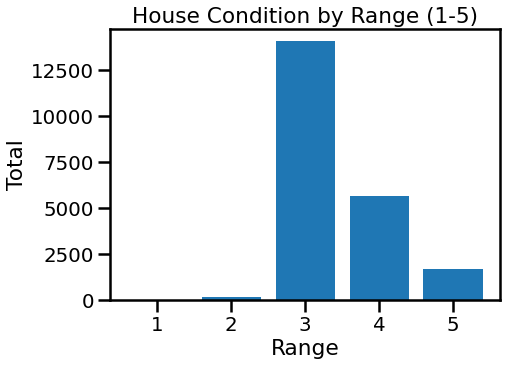

In [127]:
plt.figure(figsize=(7,5))
plt.bar(condition.index,condition)
plt.xticks(df['condition'].value_counts().index,rotation='horizontal')
plt.ylabel('Total')
plt.xlabel('Range')
plt.title('House Condition by Range (1-5)')
plt.show()

In [20]:
floor = df['floors'].value_counts()
floor

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

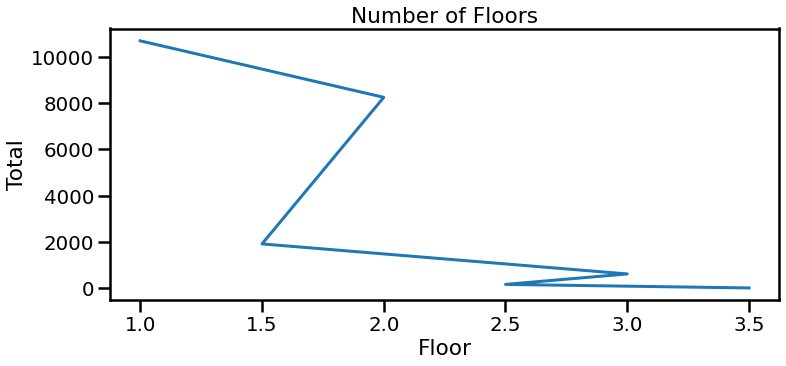

In [38]:
plt.figure(figsize=(12,5))
plt.plot(floor.index,floor)
plt.xticks(df['floors'].value_counts().index,rotation='horizontal')
plt.ylabel('Total')
plt.xlabel('Floor')
plt.title('Number of Floors')
plt.show()

In [46]:
bdrm=df['bedrooms'].value_counts()
bdrm

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
33       1
11       1
Name: bedrooms, dtype: int64

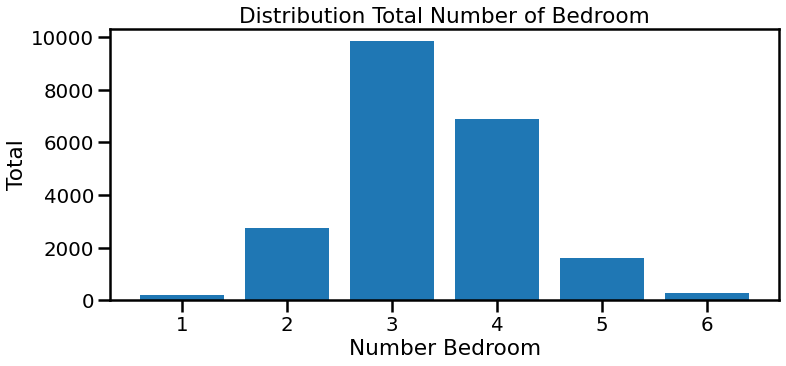

In [45]:
plt.figure(figsize=(12,5))
plt.bar(bdrm.index[0:6],bdrm[0:6])
plt.xticks(df['bedrooms'].value_counts()[0:6].index,rotation='horizontal')
plt.ylabel('Total')
plt.xlabel('Number Bedroom')
plt.title('Distribution Total Number of Bedroom')
plt.show()

In [47]:
grade = df['grade'].value_counts()
grade

7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64

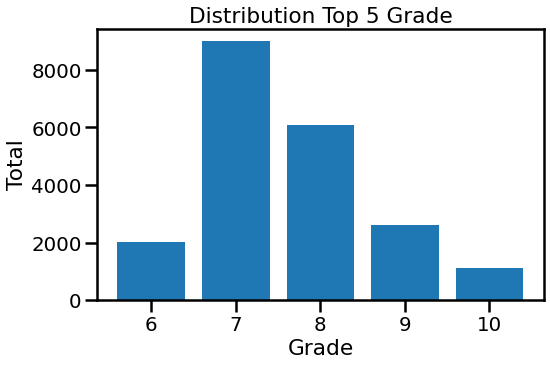

In [49]:
plt.figure(figsize=(8,5))
plt.bar(grade.index[0:5],grade[0:5])
plt.xticks(df['grade'].value_counts()[0:5].index,rotation='horizontal')
plt.ylabel('Total')
plt.xlabel('Grade')
plt.title('Distribution Top 5 Grade')
plt.show()

In [56]:
bath=df['bathrooms'].value_counts()
bath

2.50    5380
1.00    3852
1.75    3048
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
0.00      10
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
6.25       2
8.00       2
6.75       2
6.50       2
7.75       1
7.50       1
Name: bathrooms, dtype: int64

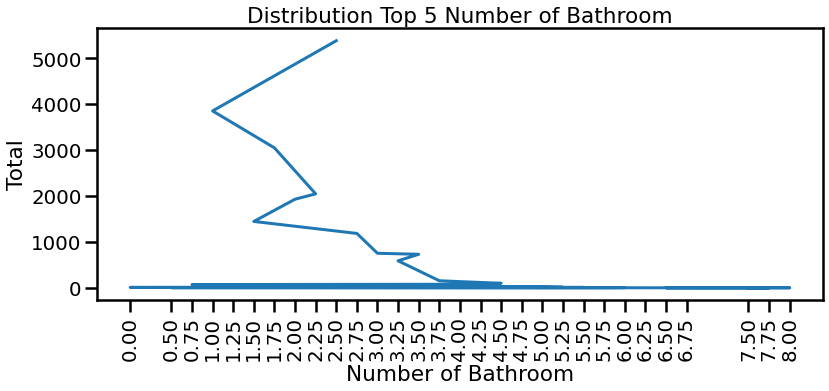

In [64]:
plt.figure(figsize=(13,5))
plt.plot(bath.index,bath)
plt.xticks(df['bathrooms'].value_counts().index,rotation='vertical')
plt.ylabel('Total')
plt.xlabel('Number of Bathroom')
plt.title('Distribution Top 5 Number of Bathroom')
plt.show()

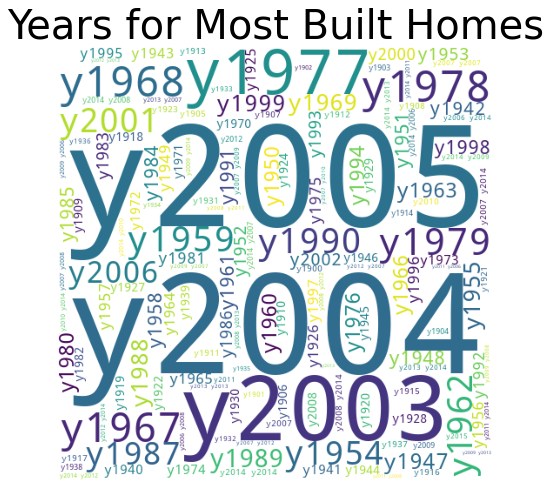

In [72]:
# Thanks to: https://www.kaggle.com/darkcore/house-sales-visualization
df["Years"] = df["yr_built"].apply(lambda x: "y" + str(x))
plt.subplots(figsize=(8,8))
wcloud  = WordCloud(background_color="white",width=500,height=500).generate(",".join(df["Years"]))
plt.imshow(wcloud)
plt.title("Years for Most Built Homes",fontsize=40)
plt.axis("off")
plt.show()

In [4]:
df.drop(labels=['date'],axis=1,inplace=True)

In [5]:
# split x and y
from sklearn.model_selection import train_test_split
X=df.drop(['price'], axis=1)
y=df['price']

In [9]:
# set 20% as data test and 80% as data train
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
# scaling the data
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [15]:
train_data=x_train.join(y_train)

C:\Users\win10\anaconda3\envs\venv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

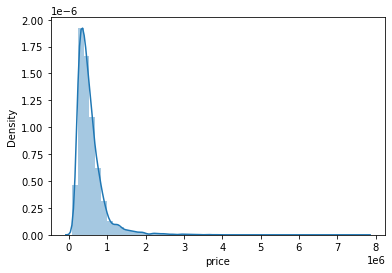

In [16]:
# visualize distributions house price
sns.distplot(train_data['price'])

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'log_price'}>]], dtype=object)

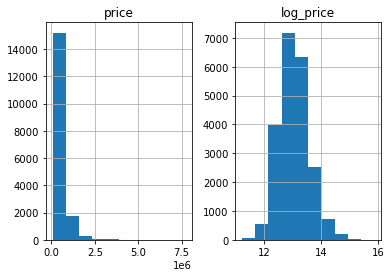

In [17]:
price = pd.DataFrame({'price':train_data['price'], 'log_price':np.log1p(df['price'])})
price.hist()

<AxesSubplot:>

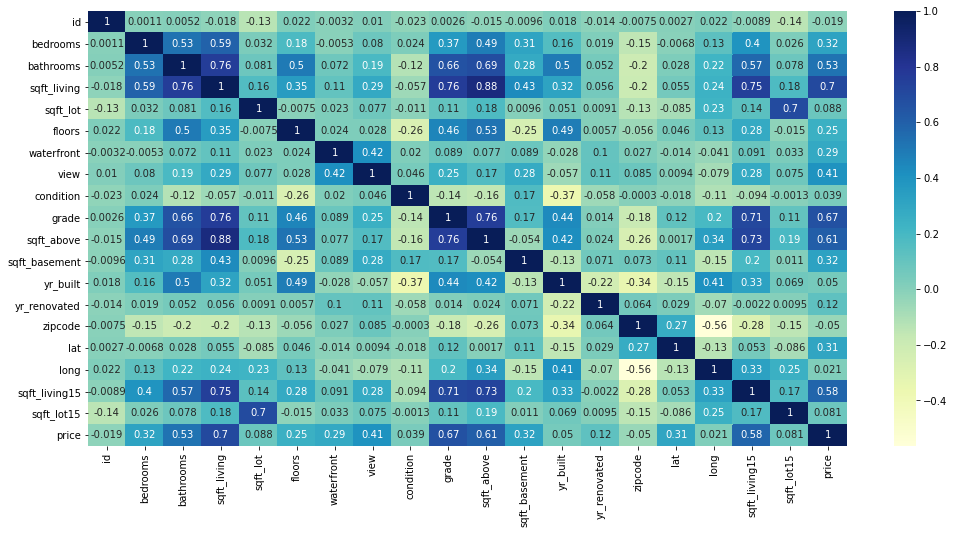

In [18]:
# visualizing the correlations between numerical variables
plt.figure(figsize=(17,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

# Random Forest Regression

In [45]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()


forest.fit(x_train,y_train)

RandomForestRegressor()

In [46]:
forest.score(x_test,y_test)

0.8739891078693469

# Hyperparameter Tunning

In [36]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()
paramgrid = {
    "n_estimators":[3,10,30],
    "max_features":[2,4,6,8]
    
}
grid_search = GridSearchCV(forest,paramgrid,cv=5, 
                          scoring="neg_mean_squared_error",
                          return_train_score=True)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [37]:
best_forest=grid_search.best_estimator_

In [38]:
best_forest.score(x_train,y_train)

0.9806736472159302

# Save the model to disk

In [57]:
filename = 'model_coba.sav'
pickle.dump(forest, open(filename, 'wb')) 

In [10]:
filename = 'model_coba.sav'

# Load the model from disk


In [17]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.9541190242660981
